In [1]:
import sqlite3
import time
import datetime
import random

In [2]:
conn = sqlite3.connect('class1.db')
c = conn.cursor()

In [3]:
def createTable():
    c.execute('CREATE TABLE IF NOT EXISTS ourTable(unix REAL, datestamp TEXT, keyword TEXT, value REAL)')

## Inserting Variables to database dynamically

In [4]:
def dynamic_dataEntry():
    unix = time.time()
    date = str(datetime.datetime.fromtimestamp(unix).strftime('%Y-%m-%d %H:%M:%S'))
    
    keyword = 'Python'
    
    value = random.randrange(0,10)
    
    c.execute("INSERT INTO ourTable (unix, datestamp, keyword, value) VALUES(?, ?, ?, ?)",
             (unix, date, keyword, value))
    
    conn.commit()
    

In [5]:
createTable()
for i in range(10):
    dynamic_dataEntry()
    time.sleep(2)

# c.close()
# conn.close()

## Reading the database or table

In [6]:
def read_from_db():
    c.execute('SELECT * FROM ourTable')
    data = c.fetchall()
    print(data)

In [7]:
read_from_db()

[(1576858220.8802922, '2019-12-20 21:40:20', 'Python', 6.0), (1576858222.895574, '2019-12-20 21:40:22', 'Python', 9.0), (1576858224.9032462, '2019-12-20 21:40:24', 'Python', 5.0), (1576858226.910795, '2019-12-20 21:40:26', 'Python', 3.0), (1576858228.918418, '2019-12-20 21:40:28', 'Python', 5.0), (1576858232.930326, '2019-12-20 21:40:32', 'Python', 0.0), (1576858234.938962, '2019-12-20 21:40:34', 'Python', 7.0), (1576858236.943095, '2019-12-20 21:40:36', 'Python', 9.0), (1576860407.100579, '2019-12-20 22:16:47', 'Python', 9.0), (1576860411.1055622, '2019-12-20 22:16:51', 'Python', 9.0), (1576860413.112421, '2019-12-20 22:16:53', 'Python', 0.0), (1576860415.119734, '2019-12-20 22:16:55', 'Python', 6.0), (1576860417.1275892, '2019-12-20 22:16:57', 'Python', 6.0), (1576860419.135376, '2019-12-20 22:16:59', 'Python', 4.0), (1576860423.148672, '2019-12-20 22:17:03', 'Python', 7.0), (1576860425.152189, '2019-12-20 22:17:05', 'Python', 7.0), (1576862063.373101, '2019-12-20 22:44:23', 'Python'

In [8]:
def read_from_db():
    c.execute('''SELECT * FROM ourTable WHERE value=6 AND keyword="Python"''')
    for i in c.fetchall():
        print(i)

In [9]:
read_from_db()

(1576858220.8802922, '2019-12-20 21:40:20', 'Python', 6.0)
(1576860415.119734, '2019-12-20 22:16:55', 'Python', 6.0)
(1576860417.1275892, '2019-12-20 22:16:57', 'Python', 6.0)


In [10]:
def read_from_db():
    c.execute('''SELECT * FROM ourTable WHERE unix> 1576858220.8802922 AND keyword="Python"''')
    for i in c.fetchall():
        print(i)

In [11]:
read_from_db()

(1576858222.895574, '2019-12-20 21:40:22', 'Python', 9.0)
(1576858224.9032462, '2019-12-20 21:40:24', 'Python', 5.0)
(1576858226.910795, '2019-12-20 21:40:26', 'Python', 3.0)
(1576858228.918418, '2019-12-20 21:40:28', 'Python', 5.0)
(1576858232.930326, '2019-12-20 21:40:32', 'Python', 0.0)
(1576858234.938962, '2019-12-20 21:40:34', 'Python', 7.0)
(1576858236.943095, '2019-12-20 21:40:36', 'Python', 9.0)
(1576860407.100579, '2019-12-20 22:16:47', 'Python', 9.0)
(1576860411.1055622, '2019-12-20 22:16:51', 'Python', 9.0)
(1576860413.112421, '2019-12-20 22:16:53', 'Python', 0.0)
(1576860415.119734, '2019-12-20 22:16:55', 'Python', 6.0)
(1576860417.1275892, '2019-12-20 22:16:57', 'Python', 6.0)
(1576860419.135376, '2019-12-20 22:16:59', 'Python', 4.0)
(1576860423.148672, '2019-12-20 22:17:03', 'Python', 7.0)
(1576860425.152189, '2019-12-20 22:17:05', 'Python', 7.0)
(1576862063.373101, '2019-12-20 22:44:23', 'Python', 7.0)
(1576862065.380491, '2019-12-20 22:44:25', 'Python', 3.0)
(1576862067

In [12]:
def read_from_db():
    c.execute('''SELECT datestamp FROM ourTable WHERE unix> 1576858220.8802922 AND keyword="Python"''')
    for i in c.fetchall():
        print(i)

In [13]:
read_from_db()

('2019-12-20 21:40:22',)
('2019-12-20 21:40:24',)
('2019-12-20 21:40:26',)
('2019-12-20 21:40:28',)
('2019-12-20 21:40:32',)
('2019-12-20 21:40:34',)
('2019-12-20 21:40:36',)
('2019-12-20 22:16:47',)
('2019-12-20 22:16:51',)
('2019-12-20 22:16:53',)
('2019-12-20 22:16:55',)
('2019-12-20 22:16:57',)
('2019-12-20 22:16:59',)
('2019-12-20 22:17:03',)
('2019-12-20 22:17:05',)
('2019-12-20 22:44:23',)
('2019-12-20 22:44:25',)
('2019-12-20 22:44:27',)
('2019-12-20 22:44:29',)
('2019-12-20 22:44:31',)
('2019-12-20 22:44:33',)
('2019-12-20 22:44:35',)
('2019-12-20 22:44:37',)
('2019-12-20 22:44:39',)
('2019-12-20 22:44:41',)


## Graphing the table

In [14]:
import matplotlib.pyplot as plt

In [15]:
def graph():
    c.execute('SELECT unix, value FROM ourTable')
    dates = []
    values = []
    data = c.fetchall()
    for i in data:
        dates.append(datetime.datetime.fromtimestamp(i[0]))
        values.append(i[1])
    
    plt.figure(figsize=(10,8))
    plt.plot_date(dates, values, '-')
    plt.show()

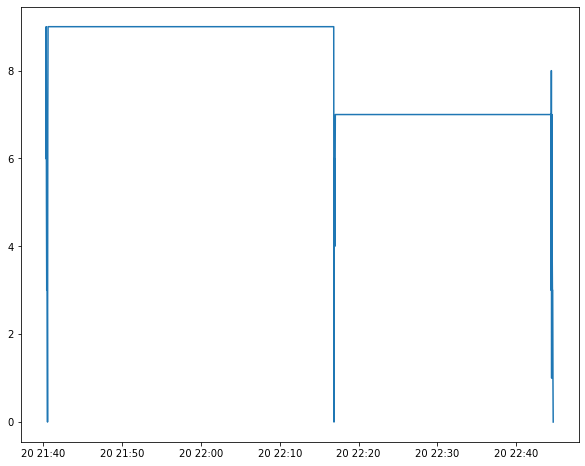

In [16]:
graph()

## Del and Update

In [17]:
def update():
    c.execute('SELECT * FROM ourTable')
    [print(i) for i in c.fetchall()]
    
    c.execute('UPDATE ourTable SET value = 99 WHERE value = 8')
    conn.commit()
    
    c.execute('SELECT * FROM ourTable')
    [print(i) for i in c.fetchall()]
    
    

In [18]:
update()

(1576858220.8802922, '2019-12-20 21:40:20', 'Python', 6.0)
(1576858222.895574, '2019-12-20 21:40:22', 'Python', 9.0)
(1576858224.9032462, '2019-12-20 21:40:24', 'Python', 5.0)
(1576858226.910795, '2019-12-20 21:40:26', 'Python', 3.0)
(1576858228.918418, '2019-12-20 21:40:28', 'Python', 5.0)
(1576858232.930326, '2019-12-20 21:40:32', 'Python', 0.0)
(1576858234.938962, '2019-12-20 21:40:34', 'Python', 7.0)
(1576858236.943095, '2019-12-20 21:40:36', 'Python', 9.0)
(1576860407.100579, '2019-12-20 22:16:47', 'Python', 9.0)
(1576860411.1055622, '2019-12-20 22:16:51', 'Python', 9.0)
(1576860413.112421, '2019-12-20 22:16:53', 'Python', 0.0)
(1576860415.119734, '2019-12-20 22:16:55', 'Python', 6.0)
(1576860417.1275892, '2019-12-20 22:16:57', 'Python', 6.0)
(1576860419.135376, '2019-12-20 22:16:59', 'Python', 4.0)
(1576860423.148672, '2019-12-20 22:17:03', 'Python', 7.0)
(1576860425.152189, '2019-12-20 22:17:05', 'Python', 7.0)
(1576862063.373101, '2019-12-20 22:44:23', 'Python', 7.0)
(157686206

In [19]:
def DEL():
    c.execute('SELECT * FROM ourTable')
    [print(i) for i in c.fetchall()]
    
    print('================')
    
    c.execute('DELETE FROM ourTable WHERE value = 99')
    conn.commit()
    
    c.execute('SELECT * FROM ourTable')
    [print(i) for i in c.fetchall()]

In [20]:
DEL()

(1576858220.8802922, '2019-12-20 21:40:20', 'Python', 6.0)
(1576858222.895574, '2019-12-20 21:40:22', 'Python', 9.0)
(1576858224.9032462, '2019-12-20 21:40:24', 'Python', 5.0)
(1576858226.910795, '2019-12-20 21:40:26', 'Python', 3.0)
(1576858228.918418, '2019-12-20 21:40:28', 'Python', 5.0)
(1576858232.930326, '2019-12-20 21:40:32', 'Python', 0.0)
(1576858234.938962, '2019-12-20 21:40:34', 'Python', 7.0)
(1576858236.943095, '2019-12-20 21:40:36', 'Python', 9.0)
(1576860407.100579, '2019-12-20 22:16:47', 'Python', 9.0)
(1576860411.1055622, '2019-12-20 22:16:51', 'Python', 9.0)
(1576860413.112421, '2019-12-20 22:16:53', 'Python', 0.0)
(1576860415.119734, '2019-12-20 22:16:55', 'Python', 6.0)
(1576860417.1275892, '2019-12-20 22:16:57', 'Python', 6.0)
(1576860419.135376, '2019-12-20 22:16:59', 'Python', 4.0)
(1576860423.148672, '2019-12-20 22:17:03', 'Python', 7.0)
(1576860425.152189, '2019-12-20 22:17:05', 'Python', 7.0)
(1576862063.373101, '2019-12-20 22:44:23', 'Python', 7.0)
(157686206